In [51]:
import numpy as np
import glob2
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import logging
import random
from numba import cuda
import math

import time

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPool2D,Flatten,Dropout

In [ ]:
from svm import *
from hog_class import *
from functions import *

In [56]:
cell_size = (8, 8)
block_size = (2, 2)
nbins = 9
threadsperblock = (32,32)
hog = HOG_CUDA_2(block_size, cell_size, nbins, 40,threadsperblock )

In [58]:
acc_SVM1 = []
acc_SVM2 = []
acc_CNN = []
time_SVM1 = []
time_SVM2 = []
time_CNN = []

In [ ]:
n_test = [100, 200, 500, 1000, 1500, 2000,4000,6000]
link_cat = "../../Main/"
link_dog = ""

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (5,5), activation = "relu", input_shape = (128,128,3)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 16, kernel_size = (5,5), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units = 256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 1, activation = "sigmoid"))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

In [59]:
for n in n_test:
    X_train, y_train, X_test, y_test = read_data(link_cat, link_dog, n)
    
    print(n)
    print("Parallel SVM - linear",n)
    start = time.time()
    svm = SVM_Pa(kernel = 'linear')
    big_fit(X_train, y_train, hog, svm)
    pred = big_predict(X_test, y_test, hog, svm)
    end = time.time()
    time_SVM1.append(end-start)
    acc_SVM1.append(accuracy_score(pred, y_test))
    
    print("Parallel SVM - rbf",n)
    start = time.time()
    svm = SVM_Pa(kernel="rbf")
    big_fit(X_train, y_train, hog, svm)
    pred = big_predict(X_test, y_test, hog, svm)
    end = time.time()
    time_SVM2.append(end-start)
    acc_SVM2.append(accuracy_score(pred, y_test))
    
    print("CNN")
    if X_train.shape[0] < 400:
        start = time.time()
        model.fit(X_train, y_train, epochs = 20)
        pred = model.predict(X_test)
        end  = time.time()
        pred = pred.round(0).astype(int)
        print(n, end-start,accuracy_score(pred, y_test))
        acc_CNN.append(accuracy_score(pred, y_test))
        time_CNN.append(end-start)
    else:
        X_train,X_val,y_train,y_val = train_test_split(X_train, y_train, test_size=0.2, random_state = 42)
        start = time.time()
        print(X_train.shape,y_train.shape,X_val.shape,y_val.shape)
        model.fit(X_train, y_train,validation_data = (X_val,y_val), epochs = 20)
        pred = model.predict(X_test)
        pred = pred.round(0).astype(int)
        end = time.time()
        print(n, end-start,accuracy_score(pred, y_test))
        acc_CNN.append(accuracy_score(pred, y_test))
        time_CNN.append(end-start)
    
    

Parallel SVM - rbf 100


C:\ProgramData\Anaconda3\envs\cuda_program\lib\site-packages\numba\cuda\dispatcher.py:488: NumbaPerformanceWarning: Grid size 9 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
C:\ProgramData\Anaconda3\envs\cuda_program\lib\site-packages\numba\cuda\cudadrv\devicearray.py:885: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))
C:\ProgramData\Anaconda3\envs\cuda_program\lib\site-packages\numba\cuda\dispatcher.py:488: NumbaPerformanceWarning: Grid size 3 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
C:\ProgramData\Anaconda3\envs\cuda_program\lib\site-packages\numba\cuda\cudadrv\devicearray.py:885: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))
C:\ProgramData\Anaconda3\envs\cuda_program\lib\site-packages\numba\cud

Parallel SVM - linear 100


C:\ProgramData\Anaconda3\envs\cuda_program\lib\site-packages\numba\cuda\dispatcher.py:488: NumbaPerformanceWarning: Grid size 9 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
C:\ProgramData\Anaconda3\envs\cuda_program\lib\site-packages\numba\cuda\cudadrv\devicearray.py:885: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))
C:\ProgramData\Anaconda3\envs\cuda_program\lib\site-packages\numba\cuda\dispatcher.py:488: NumbaPerformanceWarning: Grid size 3 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
C:\ProgramData\Anaconda3\envs\cuda_program\lib\site-packages\numba\cuda\cudadrv\devicearray.py:885: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


Parallel SVM - rbf 200


C:\ProgramData\Anaconda3\envs\cuda_program\lib\site-packages\numba\cuda\dispatcher.py:488: NumbaPerformanceWarning: Grid size 25 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
C:\ProgramData\Anaconda3\envs\cuda_program\lib\site-packages\numba\cuda\cudadrv\devicearray.py:885: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))
C:\ProgramData\Anaconda3\envs\cuda_program\lib\site-packages\numba\cuda\dispatcher.py:488: NumbaPerformanceWarning: Grid size 5 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
C:\ProgramData\Anaconda3\envs\cuda_program\lib\site-packages\numba\cuda\dispatcher.py:488: NumbaPerformanceWarning: Grid size 10 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Parallel SVM - linear 200


C:\ProgramData\Anaconda3\envs\cuda_program\lib\site-packages\numba\cuda\dispatcher.py:488: NumbaPerformanceWarning: Grid size 25 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
C:\ProgramData\Anaconda3\envs\cuda_program\lib\site-packages\numba\cuda\cudadrv\devicearray.py:885: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))
C:\ProgramData\Anaconda3\envs\cuda_program\lib\site-packages\numba\cuda\dispatcher.py:488: NumbaPerformanceWarning: Grid size 10 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Parallel SVM - rbf 500


C:\ProgramData\Anaconda3\envs\cuda_program\lib\site-packages\numba\cuda\dispatcher.py:488: NumbaPerformanceWarning: Grid size 121 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
C:\ProgramData\Anaconda3\envs\cuda_program\lib\site-packages\numba\cuda\cudadrv\devicearray.py:885: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))
C:\ProgramData\Anaconda3\envs\cuda_program\lib\site-packages\numba\cuda\dispatcher.py:488: NumbaPerformanceWarning: Grid size 11 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
C:\ProgramData\Anaconda3\envs\cuda_program\lib\site-packages\numba\cuda\dispatcher.py:488: NumbaPerformanceWarning: Grid size 55 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Parallel SVM - linear 500


C:\ProgramData\Anaconda3\envs\cuda_program\lib\site-packages\numba\cuda\dispatcher.py:488: NumbaPerformanceWarning: Grid size 121 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
C:\ProgramData\Anaconda3\envs\cuda_program\lib\site-packages\numba\cuda\cudadrv\devicearray.py:885: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))
C:\ProgramData\Anaconda3\envs\cuda_program\lib\site-packages\numba\cuda\dispatcher.py:488: NumbaPerformanceWarning: Grid size 55 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Parallel SVM - rbf 1000


C:\ProgramData\Anaconda3\envs\cuda_program\lib\site-packages\numba\cuda\cudadrv\devicearray.py:885: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))
C:\ProgramData\Anaconda3\envs\cuda_program\lib\site-packages\numba\cuda\dispatcher.py:488: NumbaPerformanceWarning: Grid size 22 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Parallel SVM - linear 1000


C:\ProgramData\Anaconda3\envs\cuda_program\lib\site-packages\numba\cuda\cudadrv\devicearray.py:885: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


Parallel SVM - rbf 1500


C:\ProgramData\Anaconda3\envs\cuda_program\lib\site-packages\numba\cuda\cudadrv\devicearray.py:885: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))
C:\ProgramData\Anaconda3\envs\cuda_program\lib\site-packages\numba\cuda\dispatcher.py:488: NumbaPerformanceWarning: Grid size 33 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Parallel SVM - linear 1500


C:\ProgramData\Anaconda3\envs\cuda_program\lib\site-packages\numba\cuda\cudadrv\devicearray.py:885: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


Parallel SVM - rbf 2000


C:\ProgramData\Anaconda3\envs\cuda_program\lib\site-packages\numba\cuda\cudadrv\devicearray.py:885: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))
C:\ProgramData\Anaconda3\envs\cuda_program\lib\site-packages\numba\cuda\dispatcher.py:488: NumbaPerformanceWarning: Grid size 44 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Parallel SVM - linear 2000


C:\ProgramData\Anaconda3\envs\cuda_program\lib\site-packages\numba\cuda\cudadrv\devicearray.py:885: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


Parallel SVM - rbf 4000


C:\ProgramData\Anaconda3\envs\cuda_program\lib\site-packages\numba\cuda\cudadrv\devicearray.py:885: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))
C:\ProgramData\Anaconda3\envs\cuda_program\lib\site-packages\numba\cuda\dispatcher.py:488: NumbaPerformanceWarning: Grid size 88 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Parallel SVM - linear 4000


C:\ProgramData\Anaconda3\envs\cuda_program\lib\site-packages\numba\cuda\cudadrv\devicearray.py:885: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


Parallel SVM - rbf 6000


C:\ProgramData\Anaconda3\envs\cuda_program\lib\site-packages\numba\cuda\cudadrv\devicearray.py:885: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


Parallel SVM - linear 6000


C:\ProgramData\Anaconda3\envs\cuda_program\lib\site-packages\numba\cuda\cudadrv\devicearray.py:885: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


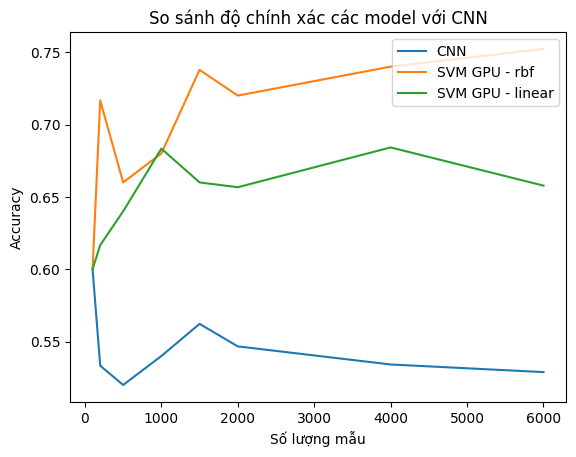

In [65]:
plt.plot(n_test, acc_SVM1 , label = 'SVM - linear')
plt.plot(n_test, acc_SVM2, label = 'SVM - rbf')
plt.plot(n_test, acc_CNN, label = 'CNN')
plt.xlabel("Số lượng mẫu")
plt.ylabel("Accuracy")
plt.title("So sánh độ chính xác các model với CNN")
plt.legend()
plt.show()

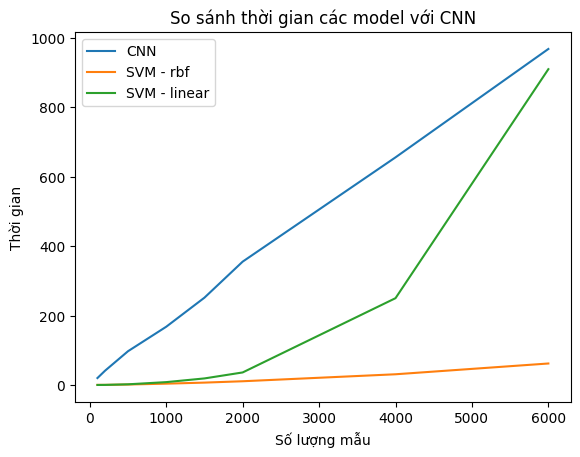

In [67]:
plt.plot(n_test, time_SVM1, label = 'SVM - linear')
plt.plot(n_test, time_SVM2, label = 'SVM - rbf')
plt.plot(n_test, time_CNN, label = 'CNN')
plt.xlabel("Số lượng mẫu")
plt.ylabel("Thời gian")
plt.title("So sánh thời gian các model với CNN")
plt.legend()
plt.show()

In [ ]:
print(svm.alphas)

In [ ]:
print(svm.dual_coef)